# Assignment 3 - Supervised Learning

## Lisa Sapozhnikov
Netid:  ls258

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?



**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**(a)** The likelihood function of the data that we wish to maximize:

$L(\mathbf{w}) = \sum_{i=1}^{n}\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i}(1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i}$

**(b)** $C(\mathbf{w}) = -\log{(L(\mathbf{w}))}$

$C(\mathbf{w}) = -\sum_{i=1}^{n}y_i\log{(\sigma(\mathbf{w}^T \mathbf{x}_i))}+(1-y_i)\log{(1-\sigma(\mathbf{w}^T \mathbf{x}_i))}$

**(c)** $\frac{\partial C}{\partial w_j} = -\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,j}$

$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right] = \left[-\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,0}\ \ ,\ -\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,1}\ \ ,\ -\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,2}\right] $

**(d)** Gradient Descent update equation, assuming $\eta$ represents the learning rate:

$\mathbf{w}(t+1) = \mathbf{w}(t+1) + \eta\nabla_{\mathbf{w}}C(\mathbf{w})$

$[\mathbf{w_0}(t+1), \mathbf{w_1}(t+1), \mathbf{w_2}(t+1)] = [\mathbf{w_0}(t), \mathbf{w_1}(t), \mathbf{w_2}(t)] + \eta\left[-\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,0}\ \ ,\ -\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,1}\ \ ,\ -\sum_{i=1}^{n}(\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,2}\right]$


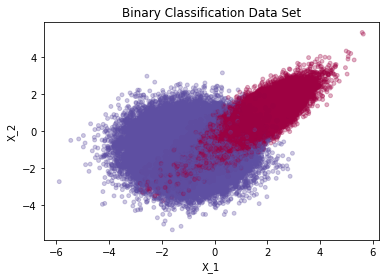

In [3]:
import numpy as np
import matplotlib.pyplot as plt

input_file = np.genfromtxt('data/A3_Q1_data.csv', delimiter=',')[1:]
x_1= input_file[:, 0]
x_2= input_file[:, 1]
y=input_file[:, 2]

plt.scatter(x_1, x_2, s=15, c=y, alpha=0.3, cmap=plt.cm.Spectral)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Binary Classification Data Set')
plt.show()

**(e)** While there is some overlap between the two classes, the data does appear to be potentially linearly separable. Since this is a binary classification problem, logistic regression is the best method to compute the most accurate probabilities that a data point belongs to one class or another. Since the decision boundary is potentially linear, linear regression is likely to yield similiarly accurate results, despite returning values not in the [0,1] range (invalid probabilities). KNN classification is unnecessary since the decision boundary does not appear highly non-linear, and there are only two potential classes.


**(f)** The data does not have any missing values or significant outliers. There is a region in which Classes 1 and 0 overlap but there are many points in that region which seem significant and thus I did not treat the points from Class 0 overlapping with Class 1 as outliers. I left the dataset unchanged.  

In [4]:
class LogisticRegression:
    
    def __init__(self, learn, epsilon):
        self.learn = learn
        self.epsilon = epsilon
        
#     def fit(self, x_train, y_train):
#         self.x_train = x_train
#         self.y_train = y_train
       
    # G
    def predict(self, X, w):
        z = np.dot(X, w)
        p = 1.0 / (1.0 + np.exp(-z))
        return p
    
    # H
    def cost(self, p, y):
        cost_1 = -y*np.log(p)
        cost_0 = (1-y)*np.log(1-p)
        cost = cost_1 - cost_0
        return cost.sum()
    
    # I
    def update_weights(self, X, y, w):
        p = self.predict(X, w)
        gradient = np.dot(X.T,  p - y)
        w = w - self.learn*gradient
        return w, p
    
    # I
    def train(self, X_train, y_train, X_test, y_test, w):
        train_costs = []
        test_costs = []
        train_cost = 0
        prev_train_cost = len(y)
        iters = 0

        while (prev_train_cost - train_cost > self.epsilon):
            iters += 1
            # Testing Data
            w,p = self.update_weights(X_train, y_train, w)
            new_cost = self.cost(p,  y_train)
            if train_cost == 0:
                train_cost = new_cost
                prev_train_cost = train_cost+2*self.epsilon
            else:
                prev_train_cost = train_cost
                train_cost = new_cost
            train_costs.append(train_cost)
            
            # Training Dtata
            p = self.predict(X_test, w)
            test_cost = self.cost(p,  y_test)
            test_costs.append(test_cost)
                
        return w, train_costs, test_costs, iters, p  

[w0, w1, w2]:
[-0.17543847 -1.91970533 -0.41189979]


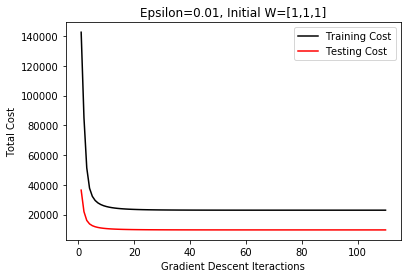

[w0, w1, w2]:
[-0.13664367 -1.88541437 -0.38464927]


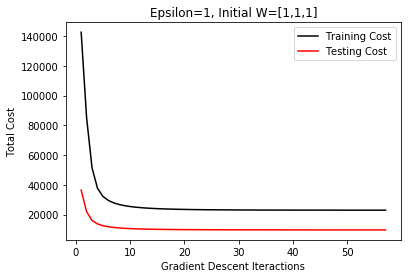

[w0, w1, w2]:
[-0.18756086 -1.91364764 -0.42283312]


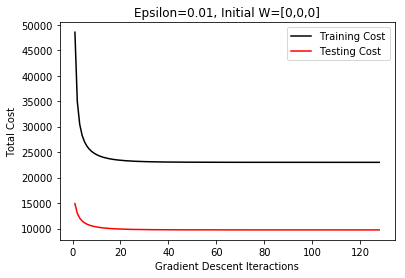

[w0, w1, w2]:
[-0.17502799 -1.92575691 -0.41074756]


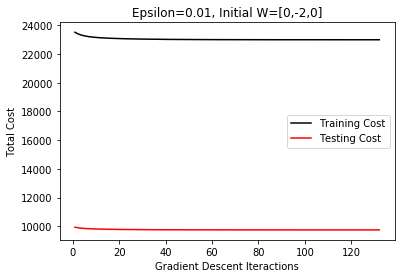

In [5]:
import matplotlib.pyplot as plt
import numpy as np

ones = np.ones([len(input_file),1])
X = np.hstack((ones, input_file[:, [0, 1]],))
w = [1,1,1]
X_train = X[:round((len(X)*.7))-1, :]
X_test = X[round((len(X)*.7)):, :]
y_train = y[:round((len(X)*.7))-1]
y_test = y[round((len(X)*.7)):]

learn = 0.00001
epsilon = 0.01

reg = LogisticRegression(learn, epsilon)
params, train_costs, test_costs, iters, p_test = reg.train(X_train, y_train, X_test, y_test, w)

print("[w0, w1, w2]:")
print(params)

plt.plot(np.linspace(1, iters, iters), train_costs, '-k')
plt.plot(np.linspace(1, iters, iters), test_costs, '-r')
plt.xlabel('Gradient Descent Iteractions')
plt.ylabel('Total Cost')
plt.title('Epsilon=0.01, Initial W=[1,1,1]')
plt.legend(['Training Cost', 'Testing Cost'])
plt.show()

epsilon = 1

reg = LogisticRegression(learn, epsilon)
params, train_costs, test_costs, iters, p_test = reg.train(X_train, y_train, X_test, y_test, w)

print("[w0, w1, w2]:")
print(params)

plt.plot(np.linspace(1, iters, iters), train_costs, '-k')
plt.plot(np.linspace(1, iters, iters), test_costs, '-r')
plt.xlabel('Gradient Descent Iteractions')
plt.ylabel('Total Cost')
plt.title('Epsilon=1, Initial W=[1,1,1]')
plt.legend(['Training Cost', 'Testing Cost'])
plt.show()

w = [0,0,0]
epsilon = 0.01

reg = LogisticRegression(learn, epsilon)
params, train_costs, test_costs, iters, p_test = reg.train(X_train, y_train, X_test, y_test, w)

print("[w0, w1, w2]:")
print(params)

plt.plot(np.linspace(1, iters, iters), train_costs, '-k')
plt.plot(np.linspace(1, iters, iters), test_costs, '-r')
plt.xlabel('Gradient Descent Iteractions')
plt.ylabel('Total Cost')
plt.title('Epsilon=0.01, Initial W=[0,0,0]')
plt.legend(['Training Cost', 'Testing Cost'])
plt.show()

w = [0,-2,0]
epsilon = 0.01

reg = LogisticRegression(learn, epsilon)
params, train_costs, test_costs, iters, p_test = reg.train(X_train, y_train, X_test, y_test, w)

print("[w0, w1, w2]:")
print(params)

plt.plot(np.linspace(1, iters, iters), train_costs, '-k')
plt.plot(np.linspace(1, iters, iters), test_costs, '-r')
plt.xlabel('Gradient Descent Iteractions')
plt.ylabel('Total Cost')
plt.title('Epsilon=0.01, Initial W=[0,-2,0]')
plt.legend(['Training Cost', 'Testing Cost'])
plt.show()

**(k)** The three parameters I experimented with in my logistic regression implementation are different initializations, learning rates, and stopping criteria.

I kept my learning rate constant at $0.00001$. A higher learning rate was too steep and produced probalities of $1$ and $0$ too quickly, while a lower learning rate went through more iterations of gradient descent but produced very similiar values. 

In my initial approach, I weighted every factor equally, with $w_j=1$. This was an innacurate assumption and produced a very high initial error which was quickly reduced through iterations of gradient descent. Having calculated the weights to minimize cost, I modified my initial weights. The closer the initial weights were to the calculated minimized weights the lower the initial testing and training costs were, but eventually despite the initial weights, very similiar final weights were calculated.

The main factor which affected the values of the minimizing weights calculated was my stopping condition. I implemented gradient descent to stop when the calculated cost decreased the previous cost by a value less than $\epsilon$, a value input to the program. An epsilon value of $0.01$ seemed to maximize accuracy without futility. An epsilon value of $1$ was not accurate enough and calculated weights which were significantly different than all the weights calculated at $\epsilon = 0.01$.


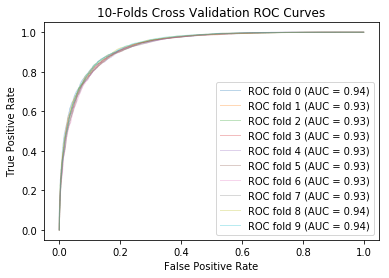

In [202]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

learn = 0.00001
epsilon = 0.01
w = [0,-2,0]
reg = LogisticRegression(learn, epsilon)
skf = StratifiedKFold(n_splits=10)
i = 0;

for train, test in skf.split(X, y):
    params, train_costs, test_costs, iters, p_test = reg.train(X[train], y[train], X[test], y[test], w)
    fpr, tpr, thresholds = roc_curve(y[test], p_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('10-Folds Cross Validation ROC Curves')
plt.legend(loc='best')
plt.show()

**(m)** We use cross validation to test the performance of our trained model on data it has not yet seen. Since this data wasn't used to train the model this helps us get a more accurate assessment of the model's performance. Using k-folds cross validation helps us generalize and average this assessment by alternating the training and testing splits of the data.

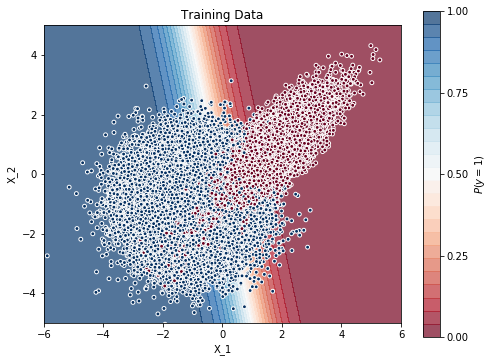

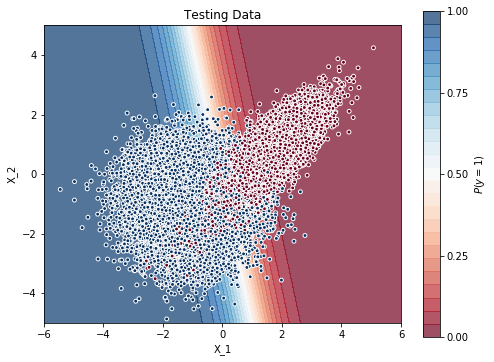

In [228]:
w=[[-0.17502799], [-1.92575691], [-0.41074756]]
#p_train = reg.predict(X_train, w)

X_train = X[:round((len(X)*.7))-1, :]
X_test = X[round((len(X)*.7)):, :]
y_train = y[:round((len(X)*.7))-1]
y_test = y[round((len(X)*.7)):]

xx, yy = np.mgrid[-6:6:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
ones = np.ones([len(grid),1])
xx_train = np.hstack((ones, grid))
p_train = reg.predict(xx_train, w)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, p_train.reshape(xx.shape), 25, alpha = 0.7, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train[:,1], X_train[:, 2], c=y_train, s=15,
           cmap="RdBu", edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 6), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Training Data')
plt.show()

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, p_train.reshape(xx.shape), 25, alpha = 0.7, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:,1], X_test[:, 2], c=y_test, s=15,
           cmap="RdBu", edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 6), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Testing Data')
plt.show()

**(n)** My logistic regression is using a decision boundary of 0.5. Probabilities higher than 0.5 assign a Class 1 label, probabilities lower than 0.5 assign a Class 0 label. As seen in the plots above, the decision boundary isn't perfectly accurate and sometimes claffisies Class 0 points as Class 1 and vice versa. How the decision boundary can be improved depends on what is most important in this particular problem. If we seek to increase the true positive rate even at the cost of increasing the false positive rate, the decision boundary could be lowered to 0.2 or 0.3.

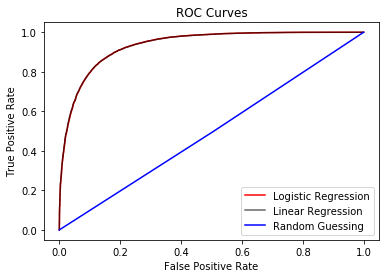

In [156]:
from sklearn import datasets, linear_model

p_test_logistic = reg.predict(X_test, w)
fpr, tpr, thresholds = roc_curve(y_test, p_test_logistic)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, '-r')

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
p_test_lin = lin_regr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, p_test_lin)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, '-k', alpha=0.6)

p_test_random = np.random.choice(2, len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, p_test_random)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, '-b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(['Logistic Regression', 'Linear Regression', 'Random Guessing'])
plt.show()

**(o)** My logistic regression and linear regression models produced identical ROC curves, indicating similiarly accurate performances. Since the logistic regression decision boundary plotted above is shown to be linear, a linear regression model performs just as well at classifying this dataset. The randomly generated predictions performed worse; the true positive rates always equaled the false positive rates since the probability of a random classifier being correct about a data point = 0.5. 

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from struct import unpack

# Image file parsing function from https://gist.github.com/mGalarnyk/aa79813d7ecb0049c7b926d53f588ae1
def loadmnist(imagefile, labelfile): 

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)


x_train, y_train = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
x_test, y_test = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

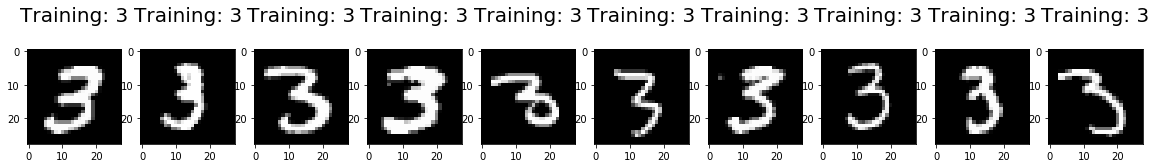

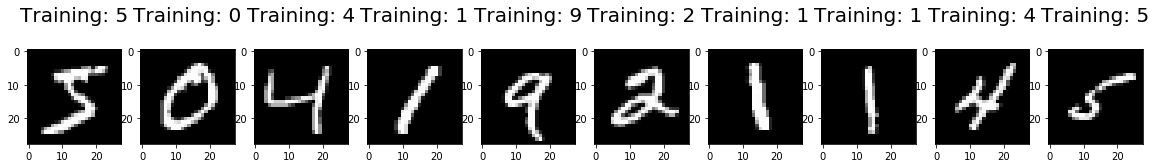

In [7]:
plt.figure(figsize=(20,8))
ind = 0
for index, (image, label) in enumerate(zip(x_train[0:100], y_train[0:100])):
    if label != 3:
        continue
    if ind > 9:
        break
    plt.subplot(1, 10, ind+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    ind += 1
plt.show()

plt.figure(figsize=(20,8))
ind = 0
for index, (image, label) in enumerate(zip(x_train[0:100], y_train[0:100])):
    if label == 3:
        continue
    if ind > 9:
        break
    plt.subplot(1, 10, ind+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    ind += 1
plt.show()

In [8]:
y_train = np.where(y_train == 3, 1, 0)
print("%.0f / 60000 training images are 3s" % y_train.sum())
y_test = np.where(y_test == 3, 1, 0)
print("%.0f / 10000 testing images are 3s" % y_test.sum())

6131 / 60000 training images are 3s
1010 / 10000 testing images are 3s


**(c)** About 10% of both the training and testing data are 3s, which makes sense because 3 is one of ten potential digits. Yet since we are only classifying a number as a "3" or "not 3", 90% of our data belongs to Class 0 and only 10% belongs to Class 1. Since we have so much data for Class 0, it is possible our classifier will have a high false negative rate.

6-Folds Logistic Regression Accuracies (fraction of correct predictions):
[0.97170282971702826, 0.97189999999999999, 0.97340000000000004, 0.97199999999999998, 0.97009999999999996, 0.97479747974797482]


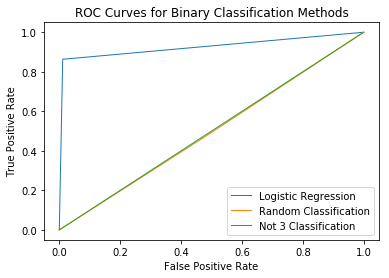

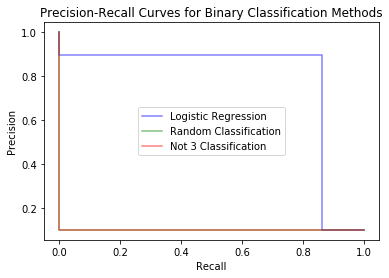

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(n_splits=6)
regr = LogisticRegression(solver = 'lbfgs')

i = 0;

for train, test in skf.split(x_train, y_train):
    regr.fit(x_train[train], y_train[train])
    accuracies.append(regr.score(x_train[test], y_train[test]))
    
print('6-Folds Logistic Regression Accuracies (fraction of correct predictions):')
print(accuracies)

regr.fit(x_train, y_train)
p_log = regr.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, p_log)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, label='Logistic Regression')

p_test_random = np.random.choice(2, len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, p_test_random)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, label='Random Classification')

p_test_0 = np.zeros(len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, p_test_0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, label='Not 3 Classification')

plt.title('ROC Curves for Binary Classification Methods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


precision, recall, thresholds = precision_recall_curve(y_test, p_log)
plt.step(recall, precision, color='b', alpha=0.5, where='post', label='Logistic Regression')

precision, recall, thresholds = precision_recall_curve(y_test, p_test_random)
plt.step(recall, precision, color='g', alpha=0.5, where='post', label='Random Classification')

precision, recall, thresholds = precision_recall_curve(y_test, p_test_0)
plt.step(recall, precision, color='r', alpha=0.5, where='post', label='Not 3 Classification')

plt.title('Precision-Recall Curves for Binary Classification Methods')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()


**(d)** Since this is a binary classification problem I opted to use a Logistic Regression classifier. I rejected Linear Regression since the decision boundary is most likely non-linear and rejected KNN since it performs poorly in higher dimensions and weights each predictor equally, when the pixels on the edges of the image were much less likely to be significant. I used the **lbfgs** (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) Logistic Regression solver since it is much faster than the default **libliner** solver.

My classifier performed well, it's accuracy scores ranging from $0.970 - 0.974$ during cross validation. Its ROC curve curved the top-left of the graph (high true positive rate-low false positive rate), and the precision recall curve indicated high recall (increasing true positive rate), while also maintaining high precision (low false positive rate).

For the Random Generation Classifier, the true positive rates always equaled the false positive rates since the probability of a random classifier being correct about a data point = 0.5, so as soon as the false positive rate decreases, the true positive rate decreases as well.

For the Not 3 Classifier, no positive predictions are made so the True Positive Rate = False Positive Rate = 0.

In [70]:
from sklearn.metrics import f1_score

def cost_fn(p, y):
        cost_1 = -y*np.log(p)
        cost_0 = (1-y)*np.log(1-p)
        cost = cost_1 - cost_0
        return cost.sum()

non_zero_coefs = []
costs = []
roc_aucs = []
f1s = []

reg_c = np.linspace(0.01, 5, 25)
for c in reg_c:
    regr = LogisticRegression(penalty='l1', C=1/c)
    regr.fit(x_train, y_train)
    p = regr.predict_proba(x_test)
    non_zero_coefs.append(np.where(regr.coef_[0] != 0, 1, 0).sum())
    p = np.where(p == 0, 0.0000001, p)
    p = np.where(p == 1, 0.9999999, p)
    costs.append(cost_fn(p[:,1], y_test))
    fpr, tpr, thresholds = roc_curve(y_test, p[:,1])
    roc_aucs.append(auc(fpr, tpr))
    p = np.where(p > 0.5, 1, 0)
    f1s.append(f1_score(y_test, p[:,1]))

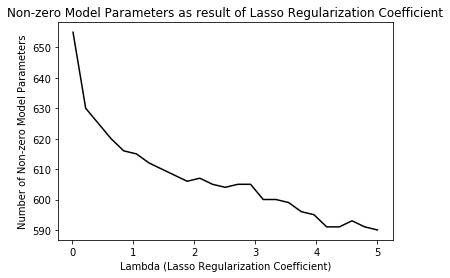

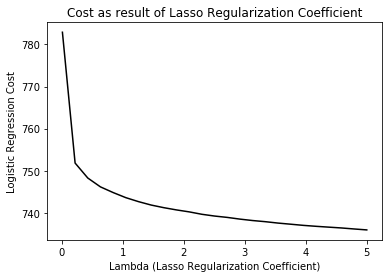

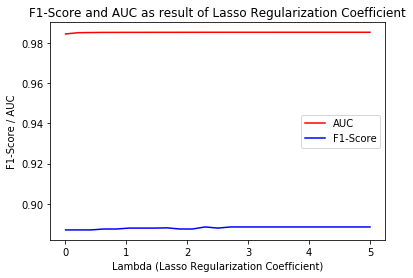

In [71]:
plt.plot(reg_c, non_zero_coefs, '-k')
plt.xlabel('Lambda (Lasso Regularization Coefficient)')
plt.ylabel('Number of Non-zero Model Parameters')
plt.title('Non-zero Model Parameters as result of Lasso Regularization Coefficient')
plt.show()

plt.plot(reg_c, costs, '-k')
plt.xlabel('Lambda (Lasso Regularization Coefficient)')
plt.ylabel('Logistic Regression Cost')
plt.title('Cost as result of Lasso Regularization Coefficient')
plt.show()

plt.plot(reg_c, roc_aucs, '-r', label='AUC')
plt.plot(reg_c, f1s, '-b', label='F1-Score')
plt.xlabel('Lambda (Lasso Regularization Coefficient)')
plt.ylabel('F1-Score / AUC')
plt.title('F1-Score and AUC as result of Lasso Regularization Coefficient')
plt.legend()
plt.show()

**(e)** Lasso regularization is applied to a model to prevent overfitting to the training data by reducing the magnitude of the model coefficients, some of them to zero. As the regularization coefficient is increased, the model is further generalized and more of the model coefficients are zeroed. Generalizing the model decreased the cost, and slightly increases the AUC and F1-score. For this particular dataset, there are only a select few pixels crucial to determining whether an image is a 3 or not. Generalizing the model weighs these critical pixels more than other border pixels, more accurately identifying what details of an image make it a 3. Increasing the regularization coefficient too much will lead to underfit,decreasing variance but increasing bias - hurting the model's performance.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)** On Kaggle I found a dataset of 859 samples taken from the gynecology department of the Hospital Universitario de Caracas in Caracas, Venezuela. The dataset describes personal details of the 859 women's lives and whether they were tested for and diagnosed with cervical cancer. Worldwide, there are roughly 500,000 diagnoses of and 200,000 deaths from cervical cancer worldwide each year. In developed countries, women are encouraged to be routinely tested for cervical abnormalities every 2-3 years via the pap smear - a preliminary examination which has been know to return false negatives. It is important for doctors to be able to warn their patients of cervical cancer risk factors and to know when to be suspcious and more dilligent when an at-risk patients's pap smear returns negative. 

I am of course not the first person studying such a prominent cancer, but I am interested in analyzing whether this small dataset confirms the commonly accepted risk factors and if I am able to learn anything new about cervical cancer risk factors or the women of Caracas. 

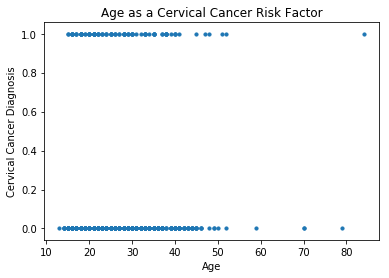

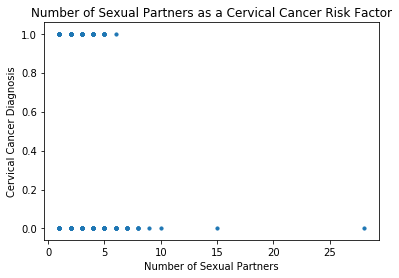

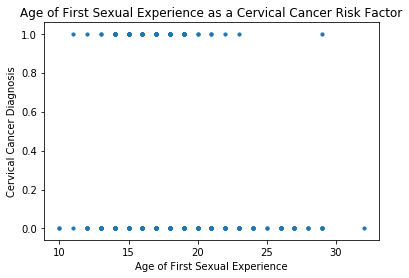

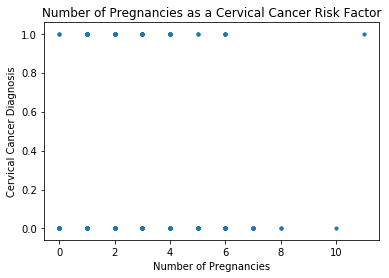

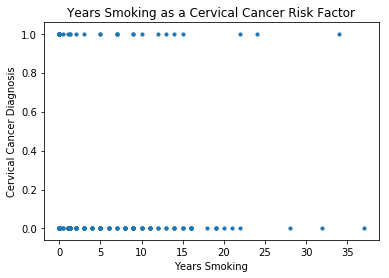

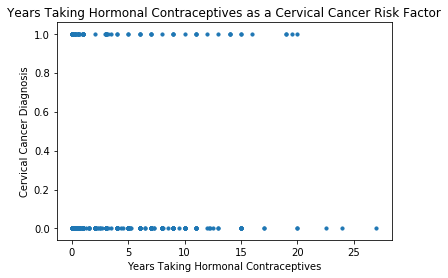

In [34]:
import numpy as np
import matplotlib.pyplot as plt

input_file = np.genfromtxt('data/kag_risk_factors_cervical_cancer.csv', delimiter=',')[1:]
y = np.logical_or(np.logical_or(input_file[:,32], input_file[:,33]), np.logical_or(input_file[:,34], input_file[:,35])).astype(int)

age = input_file[:,0];
plt.scatter(age, y, s=10)
plt.xlabel('Age')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Age as a Cervical Cancer Risk Factor')
plt.show()

num_sexual_partners = input_file[:,1];
plt.scatter(num_sexual_partners, y, s=10)
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Number of Sexual Partners as a Cervical Cancer Risk Factor')
plt.show()

first_sexual_exp = input_file[:,2];
plt.scatter(first_sexual_exp, y, s=10)
plt.xlabel('Age of First Sexual Experience')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Age of First Sexual Experience as a Cervical Cancer Risk Factor')
plt.show()

num_pregnancies = input_file[:,3];
plt.scatter(num_pregnancies, y, s=10)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Number of Pregnancies as a Cervical Cancer Risk Factor')
plt.show()

years_smoking = input_file[:,5];
plt.scatter(years_smoking, y, s=10)
plt.xlabel('Years Smoking')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Years Smoking as a Cervical Cancer Risk Factor')
plt.show()

years_hormonal_contraceptives = input_file[:,8] + input_file[:,10];
plt.scatter(years_hormonal_contraceptives, y, s=10)
plt.xlabel('Years Taking Hormonal Contraceptives')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Years Taking Hormonal Contraceptives as a Cervical Cancer Risk Factor')
plt.show()

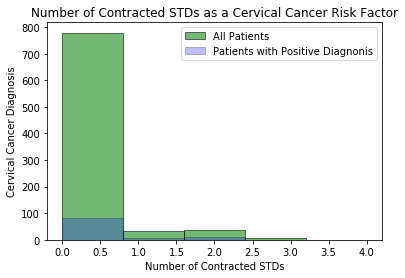

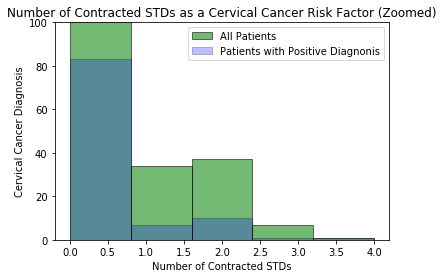

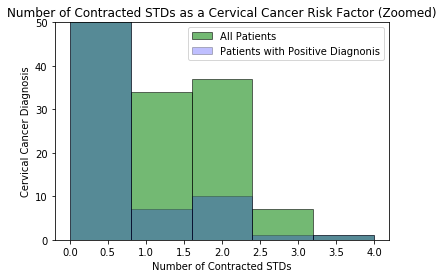

In [55]:
num_std = np.nan_to_num(input_file[:,12]);
n, bins, patches = plt.hist(num_std, 5, range = [0,4], facecolor='green', edgecolor="black", linewidth=1, alpha=0.55, label='All Patients');
n, bins, patches = plt.hist(np.where(y==1, num_std, -1), 5, range = [0,4], facecolor='blue', edgecolor="black", linewidth=1, alpha=0.25, label='Patients with Positive Diagnonis');
plt.xlabel('Number of Contracted STDs')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Number of Contracted STDs as a Cervical Cancer Risk Factor')
plt.legend(loc='best')
plt.show()

n, bins, patches = plt.hist(num_std, 5, range = [0,4], facecolor='green', edgecolor="black", linewidth=1, alpha=0.55, label='All Patients');
n, bins, patches = plt.hist(np.where(y==1, num_std, -1), 5, range = [0,4], facecolor='blue', edgecolor="black", linewidth=1, alpha=0.25, label='Patients with Positive Diagnonis');plt.ylim(0,100)
plt.xlabel('Number of Contracted STDs')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Number of Contracted STDs as a Cervical Cancer Risk Factor (Zoomed)')
plt.legend(loc='best')
plt.show()

n, bins, patches = plt.hist(num_std, 5, range = [0,4], facecolor='green', edgecolor="black", linewidth=1, alpha=0.55, label='All Patients');
n, bins, patches = plt.hist(np.where(y==1, num_std, -1), 5, range = [0,4], facecolor='blue', edgecolor="black", linewidth=1, alpha=0.25, label='Patients with Positive Diagnonis');
plt.ylim(0,50)
plt.xlabel('Number of Contracted STDs')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('Number of Contracted STDs as a Cervical Cancer Risk Factor (Zoomed)')
plt.legend(loc='best')
plt.show()

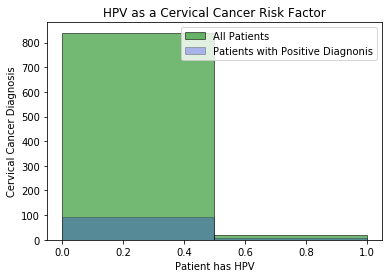

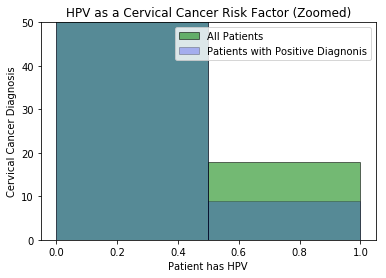

In [41]:
hpv = input_file[:,30]
n, bins, patches = plt.hist(hpv, 2, range = [0,1], facecolor='green', edgecolor="black", linewidth=1, alpha=0.55, label='All Patients');
n, bins, patches = plt.hist(np.where(y==1, hpv, -1), 2, range = [0,1], facecolor='blue', edgecolor="black", linewidth=1, alpha=0.25, label='Patients with Positive Diagnonis');
plt.xlabel('Patient has HPV')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('HPV as a Cervical Cancer Risk Factor')
plt.legend(loc='best')
plt.show()

n, bins, patches = plt.hist(hpv, 2, range = [0,1], facecolor='green', edgecolor="black", linewidth=1, alpha=0.55, label='All Patients');
n, bins, patches = plt.hist(np.where(y==1, hpv, -1), 2, range = [0,1], facecolor='blue', edgecolor="black", linewidth=1, alpha=0.25, label='Patients with Positive Diagnonis');
plt.xlabel('Patient has HPV')
plt.ylabel('Cervical Cancer Diagnosis')
plt.title('HPV as a Cervical Cancer Risk Factor (Zoomed)')
plt.ylim(0,50)
plt.legend(loc='best')
plt.show()

**(b)** Plotted above are various patient observations classified as belonging to a patient with a cervical cancer diagnosis or a cancer-free patient. Since there are a multitude of factors, I plotted each one individually to assess its individual effect on cervical cancer. An HPV diagnosis is the only observation immediately identifiable as a risk factor. Fifty percent of patients testing positive for HPV were discovered to have cervical cancer, while only ten percent of patients testing negative for HPV had cervical cancer. This result is medically accurate; HPV leads to the development of precancerous lesions and is linked to more than 90 % of cases of cervical cancer. As for the other predictors, an individual link between the predictor and diagnosis is not immediately visible. With the help of a classification model, I am hoping to learn how these predictors, especially when paired together, increase the risk of  cervical cancer.

**(c)** Through my supervised learning model, I am trying to predict an individual's risk factor of developing cervical cancer. The predictors I am working with are a patient's age, number of sexual partners, age of first sexual experience, intake of hormonal birth control, number of contracted STDs, and testing positive for HPV. 

The data was normalized but several of the observations were missing data on one or more predictors. Since the dataset was so small I did not want to discard any observations just because they were missing some data, and replaced the missing data with zeros to minimize its influence on the result. 

**(d)** Since this is a case of binary classification with many predictors I opted to use Logistic Regression. KNN performance degrades in higher dimensions and the dataset it too small to not make any assumptions of its shape. 

**(e)** Since I am using Logistic Regression, I will rely on the ROC curve as my main accuracy metric. 

**(f)** Since my dataset is so small I wanted to measure its generalization performance and opted for k-fold cross validation. I also wanted to avoid overfit to the data and created a logistic regression model with lasso regularization with a relatively high regularization coefficient of 1. 

5-Folds Logistic Regression Accuracies (fraction of correct predictions):
[0.89017341040462428, 0.87209302325581395, 0.88304093567251463, 0.88304093567251463, 0.87134502923976609]


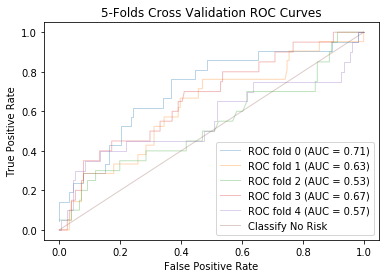

In [90]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

ones = np.ones(len(y))
X = np.nan_to_num(np.hstack((ones.reshape(-1,1), age.reshape(-1,1), num_sexual_partners.reshape(-1,1), 
               first_sexual_exp.reshape(-1,1), num_pregnancies.reshape(-1,1), years_smoking.reshape(-1,1),
               years_hormonal_contraceptives.reshape(-1,1), num_std.reshape(-1,1), hpv.reshape(-1,1))))

skf = StratifiedKFold(n_splits=5)
c = 1
regr = LogisticRegression(penalty='l1', C=1/c)
accuracies = []
i = 0

for train, test in skf.split(X, y):
    regr.fit(X[train], y[train])
    p_test = regr.predict_proba(X[test])
    accuracies.append(regr.score(X[test], y[test]))
    fpr, tpr, thresholds = roc_curve(y[test], p_test[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    if i == 4:
        p_test_0 = np.zeros(len(y[test]))
        fpr, tpr, thresholds = roc_curve(y[test], p_test_0)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='Classify No Risk')
    i += 1
    
print('5-Folds Logistic Regression Accuracies (fraction of correct predictions):')
print(accuracies)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5-Folds Cross Validation ROC Curves')
plt.legend(loc='best')
plt.show()

**(h)** While the model's accuracy was roughly 0.88, the AUC did not exceed 0.71 (ideal value = 1). While each iteration of the model performed better than a classifier that always guessed "no risk" (AUC= 0.5), some did not perform much better. This less than ideal performance is likely due to two factors. The first being that the data set has too many predictors and too few observations to accurate train a model on what is such a complex real-life problem. The second factor is that it is medically believed that HPV is easily the most indicative risk factor of cervical cancer. While number of sexual partners, STDs, age of first sexual experience, and hormonal birth control are all lesser risk factors and are in fact risk factors for contracting HPV. Based on the given, small dataset, the model cannot have weighed the predictors accurately and did not take into account any multicollinearity.

With this particular model, it is important to maximize the true positive rate, even at the cost of increasing the false positive rate. (The cost of undergoing extra testing is less than the cost of not diagnosing a treatable cancer early enough). To increase the true positive rate, the decision boundary can be decreased from a probablity of 0.5.

**(i)** Worldwide, there are roughly 500,000 diagnoses of and 200,000 deaths from cervical cancer worldwide each year. In developed countries, women are encouraged to be routinely tested for cervical abnormalities every 2-3 years via the pap smear - a preliminary examination which has been know to return false negatives. It is important for doctors to be able to warn their patients of cervical cancer risk factors and to know when to be suspcious and more dilligent when an at-risk patients's pap smear returns negative.

Even from this small, localized dataset, it can be seen that HPV is the most indicative predictor of risk of cervical cancer. Other predictors such as number of sexual partners, age of first sexual experience, use of hormonal birth control, and previous STDs have all been shown to increase risk of cervical cancer, but it is difficult to draw a distinction between them contributing to cancerous cell growth and correlating with unprotected sexual activity leading to HVP. 

The relatively low accuracy of my trained model, particularly in a field in which accuracy is so crucial is a testament to how much data valid medical theories must be supported by.